In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import cifar100

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

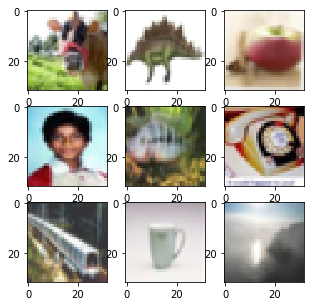

In [3]:
plt.figure(figsize=(5,5))
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i])
# show the figure
plt.show()

In [0]:
X_train, X_test = X_train/255, X_test/255

In [0]:
y_train, y_test = to_categorical(y_train, num_classes=100), to_categorical(y_test, num_classes=100)

In [6]:
X_train

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.76470588, 0.80392157, 0.75686275],
         [0.83137255, 0.87843137, 0.8       ],
         [0.71372549, 0.76078431, 0.65490196]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.66666667, 0.69019608, 0.58823529],
         [0.63137255, 0.65882353, 0.50980392],
         [0.57254902, 0.60392157, 0.44313725]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         ...,
         [0.74117647, 0.78039216, 0.6627451 ],
         [0.65098039, 0.69803922, 0.50980392],
         [0.4745098 , 0.52156863, 0.34117647]],

        ...,

        [[0.58039216, 0.7254902 , 0.30980392],
         [0.55686275, 0.71372549, 0.22352941]

In [7]:
model = Sequential()

model.add(Conv2D(64,(3,3), input_shape=(32,32,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(100, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         


In [8]:
model.compile(optimizer=Adam(lr=0.0001), metrics=['accuracy'], loss='categorical_crossentropy')

In [9]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=1000, batch_size=512, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 35000 samples, validate on 15000 samples
Epoch 1/1000
35000/35000 [==============================] - 6s 164us/step - loss: 4.6050 - acc: 0.0129 - val_loss: 4.5880 - val_acc: 0.0272
Epoch 2/1000
35000/35000 [==============================] - 2s 66us/step - loss: 4.5690 - acc: 0.0221 - val_loss: 4.5118 - val_acc: 0.0379
Epoch 3/1000
35000/35000 [==============================] - 2s 66us/step - loss: 4.4425 - acc: 0.0349 - val_loss: 4.3192 - val_acc: 0.0451
Epoch 4/1000
35000/35000 [==============================] - 2s 66us/step - loss: 4.3167 - acc: 0.0441 - val_loss: 4.2036 - val_acc: 0.0768
Epoch 5/1000
35000/35000 [==============================] - 2s 66us/step - loss: 4.2215 - acc: 0.0596 - val_loss: 4.0893 - val_acc: 0.1041
Epoch 6/1000
35000/35000 [==============================] - 2s 67us/step - loss: 4.1220 - acc: 0.0749 - val_loss: 3.9765 - val_acc: 0.1179
Epoch 7/1000
35000/35

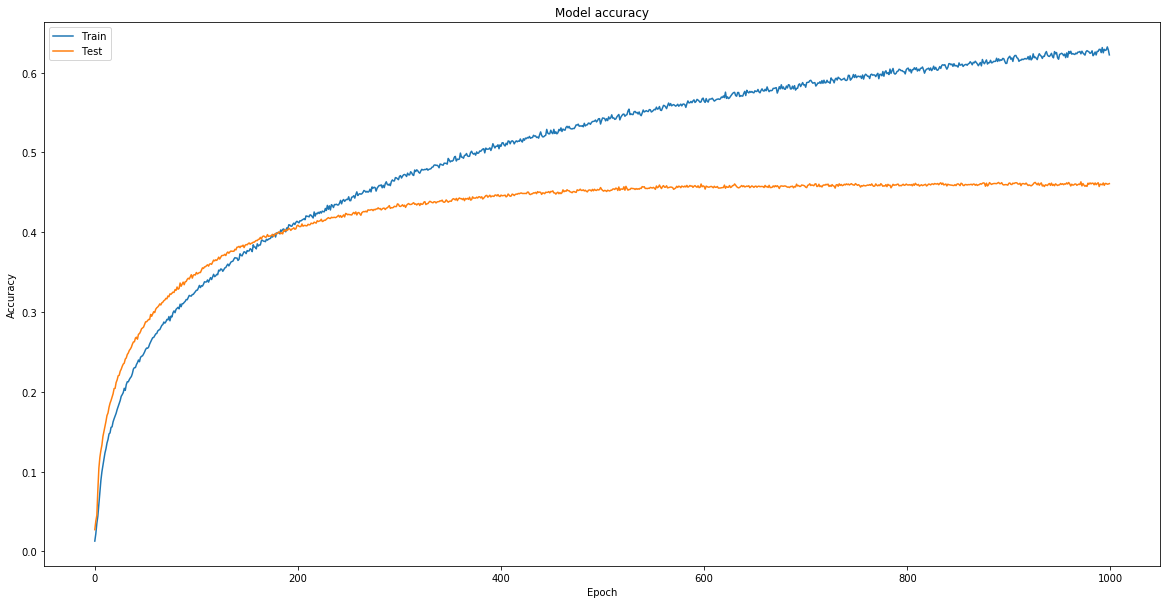

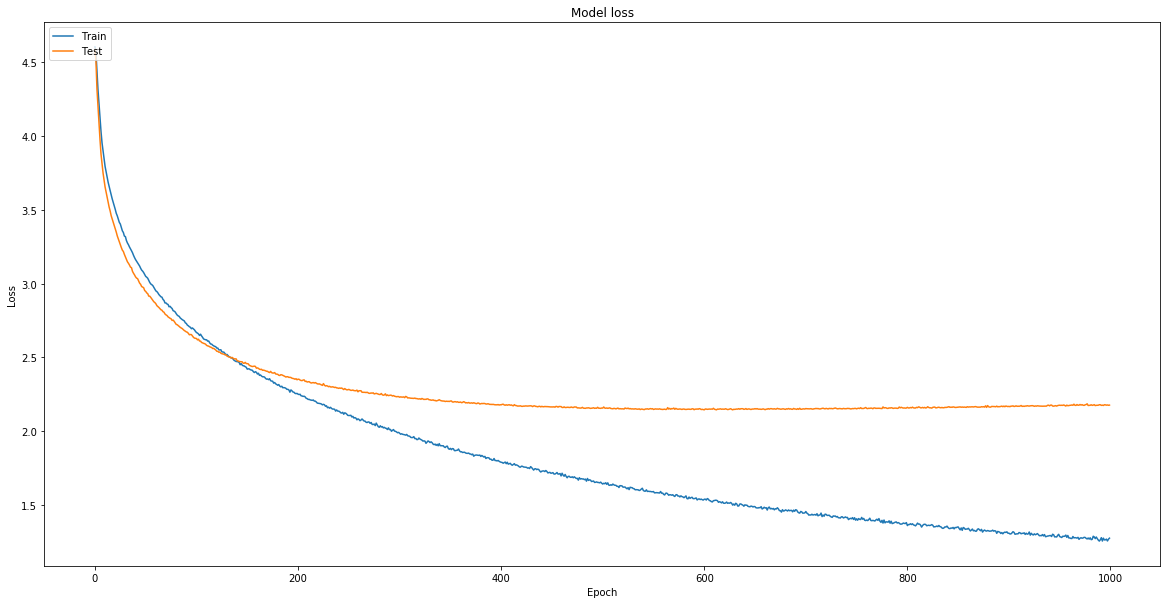

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(20,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()